In [3]:
from pathlib import Path
from shapely.errors import ShapelyDeprecationWarning

import json
import pandas as pd
import rasterio as rio
import geopandas as gpd
import warnings
import matplotlib.patches as patches

warnings.filterwarnings(action='ignore', category=ShapelyDeprecationWarning)

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
competition = "ref_fusion_competition_south_africa"
labels_258_path = f"../data/{competition}_train_labels/{competition}_train_labels_34S_19E_258N/labels.geojson"
labels_258 = gpd.read_file(labels_258_path)

labels_259_path = f"../data/{competition}_train_labels/{competition}_train_labels_34S_19E_259N/labels.geojson"
labels_259 = gpd.read_file(labels_259_path)

labels_test_path = f"../data/{competition}_test_labels/{competition}_test_labels_34S_20E_259N/labels.geojson"
labels_test = gpd.read_file(labels_test_path)

In [7]:
labels = [labels_258, labels_259, labels_test]
x_min = min([l.total_bounds[0] for l in labels]) - 1000
y_min = min([l.total_bounds[1] for l in labels]) - 1000
x_max = max([l.total_bounds[2] for l in labels]) + 1000
y_max = max([l.total_bounds[3] for l in labels]) + 1000

In [8]:
tif_path = f"../data/{competition}_train_source_planet_5day/{competition}_train_source_planet_5day_34S_19E_258N_2017_04_03/sr.tif"
tif_path2 = f"../data/{competition}_train_source_planet_5day/{competition}_train_source_planet_5day_34S_19E_259N_2017_04_03/sr.tif"
tif = rio.open(tif_path)
tif2 = rio.open(tif_path2)

In [24]:
len(labels_test)

2417

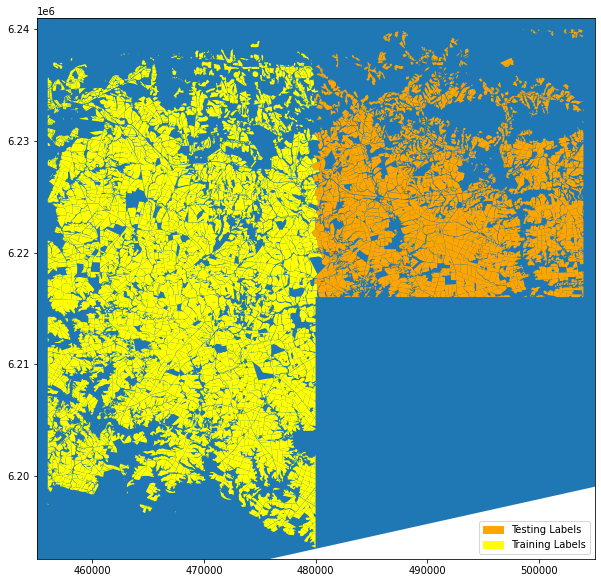

In [23]:
ax = world[world["name"] == "South Africa"].to_crs("EPSG:32734").plot(figsize=(10,10))
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
labels_258.plot(ax=ax, color="yellow")
labels_259.plot(ax=ax, color="yellow")
labels_test.plot(ax=ax, color="orange")

# for t in [tif, tif2]:
#     rect = patches.Rectangle(
#         (t.bounds[0], t.bounds[1]), 
#         t.bounds[2] - t.bounds[0],
#         t.bounds[3] - t.bounds[1],
#         linewidth=1, edgecolor='r', facecolor='none')
#     ax.add_patch(rect)
    
ax.legend(loc='lower right', handles=[
    patches.Patch(color='orange', label='Testing Labels'),
    patches.Patch(color='yellow', label='Training Labels')
])

In [24]:
name = "s2_lstm_epoch_49"

In [26]:
p = Path(f"../submissions/{name}/34S-20E-259N-2017-submission-{name}.json")
assert p.exists(), f"{p} does not exist"
with p.open("rb") as f:
    data =  json.load(f)

<AxesSubplot:>

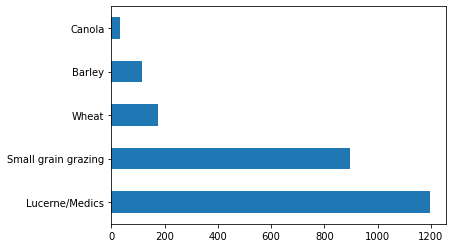

In [27]:
df["crop_name"].value_counts().plot(kind="barh")

<AxesSubplot:>

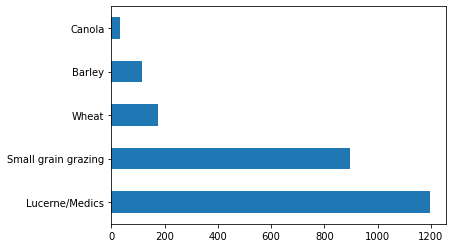

In [21]:
df["crop_name"].value_counts().plot(kind="barh")

In [17]:
(df_original["crop_id"] == df["crop_id"]).sum()

384

<AxesSubplot:>

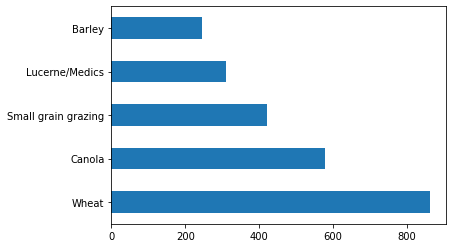

In [23]:
df_original["crop_name"].value_counts().plot(kind="barh")